In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# explore the electronic distribution function
def r0(p, z):
    c = z/np.sqrt(np.square(z)+np.square(p))
    y20 = 0.25*np.sqrt(5.0/np.pi)*(3*c*c-1)
    y30 = 0.25*np.sqrt(7.0/np.pi)*c*(5*c*c-3)
    return 10.0*(1+y20+0.5*y30)

def f(p, z):
    return 0.8/(1.0+np.exp((np.sqrt(z*z+p*p)-r0(p,z))/0.6))


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


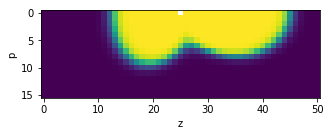

1.728589079022818e-05 3.5710147910118325e-05 0.7999530616790538


In [5]:
f_test = []
for i in range(16):
    for j in range(-25, 26):
        f_test.append(f(i,j))
f_test=np.reshape(np.array(f_test), (16,51))
fig = plt.figure(figsize=(5,10))
plt.imshow(f_test)
# plt.colorbar()
plt.xlabel('z')
plt.ylabel('p')
plt.show()
print f(1, -19), f(1, 26), f(1,0)
#so we choose p(0, 12), z(-19, 26), we should try even and uneven sampling 

In [54]:
# get matrix A for grid method 
def get_A(p_start, p_end, z_start, z_end, n_p, n_z, k2):
    dp = float((p_end-p_start)/n_p)
    dz = float((z_end- z_start)/n_z)
    print(dp, dz)
    S = n_p*n_z
    A = np.zeros((S,S))
    for i in range(S):
        A[i,i]=2*(1/(dp*dp)+1/(dz*dz))+k2/np.square((int(i/n_z)+1.0)*dp)
        if i<S-1:
            A[i,i+1]=(-1.0-1.0/(2.0*(int(i/n_z)+1.0)))/(dp*dp)
        if i>0:
            A[i,i-1] = (-1.0+1.0/(2.0*(int(i/n_z)+1.0)))/(dp*dp)
        if i>=n_z:
            A[i, i-n_z]=-1/(dz*dz)
        if i<=S-1-n_z:
            A[i, i+n_z]=-1/(dz*dz)
    return A

In [55]:
#first we try 15*15 grid
A_test = get_A(0.0,12.0,-19.0,26.0,15,15,1)
# np.set_printoptions(threshold=np.nan)
print A_test, A_test.shape

(0.8, 3.0)
[[ 4.90972222 -2.34375     0.         ...  0.          0.
   0.        ]
 [-0.78125     4.90972222 -2.34375    ...  0.          0.
   0.        ]
 [ 0.         -0.78125     4.90972222 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  3.35416667 -1.61458333
   0.        ]
 [ 0.          0.          0.         ... -1.51041667  3.35416667
  -1.61458333]
 [ 0.          0.          0.         ...  0.         -1.51041667
   3.35416667]] (225, 225)


In [44]:
# get vector f for gird method
def get_f(p_start, p_end, z_start, z_end, n_p, n_z):
    dp = float((p_end-p_start)/n_p)
    dz = float((z_end- z_start)/n_z)
    F=[]
    for i in range(1, n_p+1):
        for j in range(n_z):
            p_tmp = i*dp
            z_tmp = -19+j*dz
            F.append(f(p_tmp, z_tmp))
    F=np.array(F, np.float32)
    print('F', F.shape) 
    return F

In [45]:
#QR decomposition to solve linear equations
def QR_solve(A, b):
    Q, R = np.linalg.qr(A)
    N = A.shape[0]
    B = np.matmul(np.transpose(Q), b)
    x = np.zeros(N)
    for i in range(N)[::-1]:
        x[i]= B[i]
        for j in range(i+1, N):
            x[i]-=R[i, j]*x[j]
        x[i]=x[i]/R[i,i]
    return x

In [58]:
# try 100*100 grid 
n_p = 50
n_z=50
A0 = get_A(0.0,12.0,-19.0,26.0,n_p,n_z,1)
F0 = get_f(0.0,12.0,-19.0,26.0,n_p,n_z)
x0 = QR_solve(A0, F0)
# print x0
print np.sum(F0-np.matmul(A0, x0))

(0.24, 0.9)
('F', (2500,))
-4.716761703438266e-12


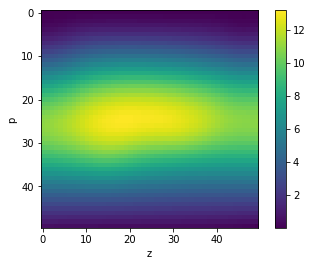

In [59]:
#visualize the solution 
x = np.reshape(x0, (n_p,n_z))
plt.xlabel('z')
plt.ylabel('p')
plt.imshow(x)
plt.colorbar()
plt.show()

In [60]:
# try 30*100 grid 
n_p = 30
n_z=100
A0 = get_A(0.0,12.0,-19.0,26.0,n_p,n_z,1)
F0 = get_f(0.0,12.0,-19.0,26.0,n_p,n_z)
x0 = QR_solve(A0, F0)
# print x0
print np.sum(F0-np.matmul(A0, x0))

(0.4, 0.45)
('F', (3000,))
-8.004374940639991e-12


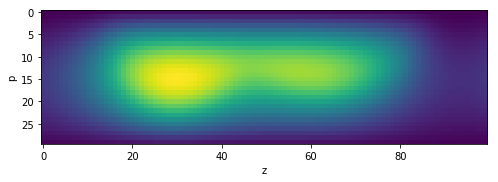

In [61]:
#visualize the solution 
x = np.reshape(x0, (n_p,n_z))
fig= plt.figure(figsize=(8,8))
plt.xlabel('z')
plt.ylabel('p')
plt.imshow(x)
# plt.colorbar()
plt.show()